In [1]:
import gymnasium as gym
import numpy as np
from simple_nn import NNetwork
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v1", render_mode="human")
output_dim = 1
input_dim = int(np.squeeze(env.observation_space.shape))
env.close()

output_dim, input_dim

(1, 4)

In [3]:
layers = [input_dim, 8, 8, output_dim]
model = NNetwork(layers)

(8, 4)
(8, 8)
(1, 8)


In [11]:
env = gym.make("CartPole-v1", render_mode="human")
observation, info = env.reset()
rewards = []
actions = []
terminations = 0
for iteration in range(1000):
    observation = np.expand_dims(observation, -1)
    a = model(observation)
    action = int(a > 0.5)
    actions.append(action)

    observation, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)

    grads = model.backward(reward)
    model.optimizer_step_up(grads)

    if terminated or truncated:
        observation, info = env.reset()
        terminations+=1
    print(f"Iteration: {iteration}, Reward: {reward}, Action{a}")

env.close()

/var/folders/2v/kf1_w44n4h7d8y01qynvcqhm0000gn/T/ipykernel_52945/3939879142.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(a > 0.5)


Iteration: 0, Reward: 1.0, Action[[0.47779968]]
Iteration: 1, Reward: 1.0, Action[[0.4775261]]
Iteration: 2, Reward: 1.0, Action[[0.47693132]]
Iteration: 3, Reward: 1.0, Action[[0.47624156]]
Iteration: 4, Reward: 1.0, Action[[0.47592534]]
Iteration: 5, Reward: 1.0, Action[[0.47652736]]
Iteration: 6, Reward: 1.0, Action[[0.47648378]]
Iteration: 7, Reward: 1.0, Action[[0.47535855]]
Iteration: 8, Reward: 1.0, Action[[0.47507966]]
Iteration: 9, Reward: 1.0, Action[[0.47515687]]
Iteration: 10, Reward: 1.0, Action[[0.47462675]]
Iteration: 11, Reward: 1.0, Action[[0.47461284]]
Iteration: 12, Reward: 1.0, Action[[0.47564086]]
Iteration: 13, Reward: 1.0, Action[[0.47535264]]
Iteration: 14, Reward: 1.0, Action[[0.47498814]]
Iteration: 15, Reward: 1.0, Action[[0.47580864]]
Iteration: 16, Reward: 1.0, Action[[0.47589925]]
Iteration: 17, Reward: 1.0, Action[[0.4748334]]
Iteration: 18, Reward: 1.0, Action[[0.47484583]]
Iteration: 19, Reward: 1.0, Action[[0.47472403]]
Iteration: 20, Reward: 1.0, Acti

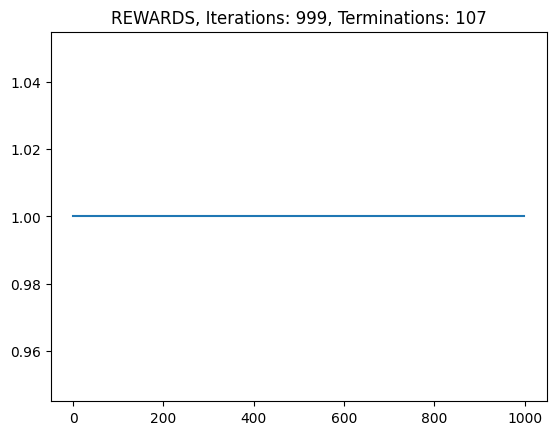

In [12]:
plt.plot(rewards)
plt.title(f"REWARDS, Iterations: {iteration}, Terminations: {terminations}")
plt.show()

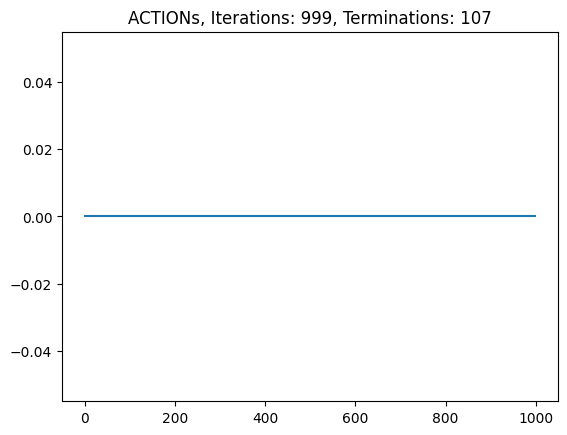

In [13]:
plt.plot(actions)
plt.title(f"ACTIONS, Iterations: {iteration}, Terminations: {terminations}")
plt.show()